<a href="https://www.kaggle.com/code/caruazu/mnist?scriptVersionId=126823601" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Um clássico do reconhecimento de dígitos

Antes de tudo vamos conhecer nossos dados.

Esse é um exemplo clássico de Aprendizado de Máquina, onde temos que fazer a máquina nos dizer qual número foi escrito.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

imagens_disponiveis = pd.read_csv("../input/digit-recognizer/train.csv")
imagens_disponiveis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [2]:
imagens_disponiveis.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Nossos dados de entrada foram organizados assim: cada linha é um exemplo. A primeira coluna informa o número escrito na imagem, e as colunas restantes são os pixels da nossa imagem. As imagens são em preto e branco, quadradas, de tamanho 28 pixels por 28 pixels. Elas foram decompostas, no sentido em que escrevemos, em uma lista de 784 inteiros que representam o quão escuro o pixel é. Variando de 0 até 255

In [3]:
#separando a classificação das imagens

digitos_disponiveis = imagens_disponiveis.pop('label')
digitos_disponiveis.head()

0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64

In [4]:
digitos_tipos = digitos_disponiveis.unique()
print(np.sort(digitos_tipos))

[0 1 2 3 4 5 6 7 8 9]


In [5]:
imagens_disponiveis = imagens_disponiveis.astype('float32')
imagens_disponiveis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 784 entries, pixel0 to pixel783
dtypes: float32(784)
memory usage: 125.6 MB


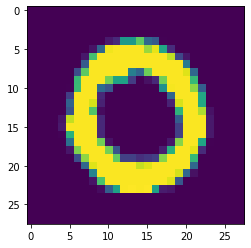

In [6]:
#visualizando as informações

img_numpy =  imagens_disponiveis[1:2].to_numpy()
imagem = img_numpy.reshape(img_numpy.shape[0], 28, 28)

plt.figure()
plt.imshow(imagem[0]) # ,cmap=plt.get_cmap('gray')
plt.show()

In [7]:
from sklearn.model_selection import train_test_split

imagens_treino,imagens_teste,digitos_treino,digitos_teste = train_test_split(
    imagens_disponiveis,
    digitos_disponiveis,
    test_size = 0.2, 
    random_state = 42
)

In [8]:
type(digitos_treino[0])

numpy.int64

In [9]:
from keras.utils import np_utils

digitos_treino_categorical = np_utils.to_categorical(digitos_treino, 10)
digitos_teste_categorical = np_utils.to_categorical(digitos_teste, 10)

type(digitos_treino_categorical[0][0])

numpy.float32

# a rede

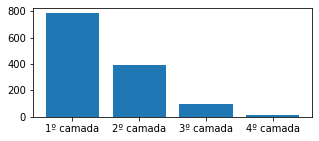

In [10]:
fig, ax = plt.subplots(figsize=(5, 2))
ax.bar(['1º camada', '2º camada', '3º camada', '4º camada'], [784, 392, 98, 10])
plt.show()

In [11]:
# criando a rede

from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

model = Sequential()
model.add(Dense(392, activation = "relu", input_shape =(784,)))
model.add(Dense(98, activation = "relu"))
model.add(Dense(10, activation ="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 392)               307720    
_________________________________________________________________
dense_1 (Dense)              (None, 98)                38514     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                990       
Total params: 347,224
Trainable params: 347,224
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.compile(
    loss="categorical_crossentropy",
    optimizer="Adam",
    metrics = ['accuracy']
)

In [13]:
model.fit(
    imagens_treino,
    digitos_treino_categorical,
    batch_size = 100,
    epochs=10,
    validation_data=(imagens_teste, digitos_teste_categorical)
)

Epoch 1/10
336/336 [==============================] - 3s 6ms/step - loss: 3.3311 - accuracy: 0.7701 - val_loss: 0.6023 - val_accuracy: 0.8612
Epoch 2/10
336/336 [==============================] - 2s 5ms/step - loss: 0.4568 - accuracy: 0.8911 - val_loss: 0.5180 - val_accuracy: 0.8733
Epoch 3/10
336/336 [==============================] - 2s 5ms/step - loss: 0.3158 - accuracy: 0.9203 - val_loss: 0.4502 - val_accuracy: 0.8937
Epoch 4/10
336/336 [==============================] - 2s 5ms/step - loss: 0.2380 - accuracy: 0.9388 - val_loss: 0.3725 - val_accuracy: 0.9192
Epoch 5/10
336/336 [==============================] - 2s 5ms/step - loss: 0.1817 - accuracy: 0.9518 - val_loss: 0.2984 - val_accuracy: 0.9360
Epoch 6/10
336/336 [==============================] - 2s 7ms/step - loss: 0.1465 - accuracy: 0.9593 - val_loss: 0.2578 - val_accuracy: 0.9410
Epoch 7/10
336/336 [==============================] - 2s 5ms/step - loss: 0.1341 - accuracy: 0.9635 - val_loss: 0.2563 - val_accuracy: 0.9430
Epoch 

In [14]:
teste_erro, teste_acurarica = model.evaluate(imagens_teste, digitos_teste_categorical)

263/263 [==============================] - 1s 2ms/step - loss: 0.2198 - accuracy: 0.9570


In [15]:
print(teste_acurarica)

0.9570237994194031


# Continua ...